# **ЗАДАНИЕ 8. НЕЛИНЕЙНЫЕ МОДЕЛИ ДЛЯ КЛАССИФИКАЦИИ. ВЫБОР ЛУЧШЕЙ МОДЕЛИ ДЛЯ КЛАССИФИКАЦИИ. ПОСТРОЕНИЕ ПРОГРАММНОГО КОНВЕЕРА**

Постройте нелинейные модели для классификации (модель ближайшего соседа, наивный байесовский классификатор, модель решающего дерева), оцените их качество, сравните с линейными моделями, выберите лучшую модель. Создайте программный конвеер для подготовки данных и моделирования, а также программный конвеер для отбора признаков и моделирования. Оцените целесообразность создания программного конвеера.
Постарайтесь максимально автоматизировать все вычисления, использовать существующие модули среды программирования Python.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

Mounted at /content/gdrive


**Методика выполнения задания:**

# **Раздел 1. Нелинейные модели для классификации**



In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200/')

In [ ]:
filename='pima-indians-diabetes.data.csv'
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv(filename,names=names)
data.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data['class'].value_counts()

In [ ]:
data[data['skin'] == 0].plas.hist()

**3. Сохраните в переменную array значения признаков, обратившись к атрибуту values.**

**4. Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.**


In [ ]:
array = data.values
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
X = array[:,0:8] # факторные признаки, т.е. параметры объекта
Y = array[:,8] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

**5. Задайте разбиение на фолды с помощью функции KFold(n_splits= n_splits, random_state = random_state, shuffle=True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

**6. Постройте модель ближайшего соседа, воспользовавшись функцией KNeighborsClassifier() из модуля sklearn.neighbors. Результат запишите в переменную model. По умолчанию k принимается равным** **5. Вы можете изменить настройки, задав другое значение параметра n_neighbors. Параметр weights отвечает за веса наблюдений. По умолчанию они одинаковые, взяты из равномерного распределения. Соответственно, вероятность каждого наблюдения равна 1/n, где n – число наблюдений.**

**7. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**

**8. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись функциями mean() и std() соответственно.**


In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

In [ ]:
model=KNeighborsClassifier() # по умолчанию k = 5

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
model.fit(X,Y)

KNeighborsClassifier()

In [ ]:
results.mean(),results.std()

(0.7109876965140123, 0.0507915093681296)

**9. Обучите модель kNN на всех данных, воспользовавшись функцией fit().**

**10. Произвольно задайте значения факторных признаков для двух новых наблюдений. Поместите их в переменную x_new. Например, np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]]).**

**11. По обученной модели дайте прогноз классов для новых наблюдений, воспользовавшись функцией predict().**

In [ ]:
x_new=np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]])

In [ ]:
model.predict(x_new)

array([0., 1.])

**12. По обученной модели дайте прогноз вероятности классов для новых наблюдений, воспользовавшись функцией predict_proba().**

In [ ]:
model.predict_proba(x_new)

array([[0.6, 0.4],
       [0.4, 0.6]])

**13. Опираясь на п.22 задания 7, сделайте вывод о нормальности распределения факторных признаков и возможности применения гауссовской функции плотности распределения для оценки вероятностей в формуле наивного байесовского классификатора. Воспользуйтесь документацией метода для подбора подходящей функции, если это нужно. Прокомментируйте результат.**

**14. Постройте модель наивного байесовского классификатора, воспользовавшись функцией GaussianNB() из модуля sklearn.naive_bayes. Результат запишите в переменную model. Можете воспользоваться другой функцией, исходя из ответа в п.13.**

**15. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**

**16. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std().**

In [ ]:
model=GaussianNB()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean()

0.7591421736158578

In [ ]:
results.std()

0.03895993346035058

In [ ]:
model.fit(X,Y)

GaussianNB()

In [ ]:
model.predict(x_new)

array([1., 1.])

In [ ]:
model.predict_proba(x_new)

array([[2.78430103e-03, 9.97215699e-01],
       [2.16502287e-04, 9.99783498e-01]])

**20. Постройте модель решающего дерева, воспользовавшись функцией DecisionTreeClassifier() из модуля sklearn.tree. Результат запишите в переменную model.
Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.
Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись, соответственно, функциями mean() и std().**

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results.mean()

0.6824333561175666

In [ ]:
results.std()

0.05385027032774458

In [ ]:
model.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
model.predict(x_new)

array([1., 1.])

In [ ]:
model.predict_proba(x_new)

array([[0., 1.],
       [0., 1.]])

In [ ]:
models=[]

In [ ]:
models.append(('LR',LogisticRegression(solver='liblinear'))) # логистическоая регрессия

In [ ]:
models.append(('SVM',SVC(kernel='linear'))) # метод опорных векторов

In [ ]:
models.append(('LDA',LinearDiscriminantAnalysis())) # линейно-дискриминантный анализ

In [ ]:
models.append(('KNN',KNeighborsClassifier())) # метод k-ближайщих соседей

In [ ]:
models.append(('NB',GaussianNB())) # наивный байесовский классификатор

In [ ]:
models.append(('CART',DecisionTreeClassifier())) # модель решающего дерева

In [ ]:
models

[('LR', LogisticRegression(solver='liblinear')),
 ('SVM', SVC(kernel='linear')),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('NB', GaussianNB()),
 ('CART', DecisionTreeClassifier())]

In [ ]:
results=[]
names=[]

In [ ]:
scoring='accuracy'

In [ ]:
for name, model in models:
  kfold=KFold(n_splits=10, random_state=7, shuffle=True)
  cv_results=cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(name,cv_results.mean(),cv_results.std())

LR 0.7708646616541353 0.05090500786917546
SVM 0.7708133971291866 0.03832392703883875
LDA 0.7669685577580315 0.04796563054016723
KNN 0.7109876965140123 0.0507915093681296
NB 0.7591421736158578 0.03895993346035058
CART 0.6811517429938482 0.04815485609642808


NameError: ignored

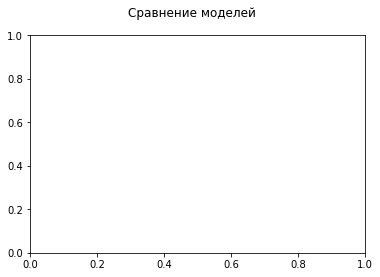

In [ ]:
import matplotlib.pyplot as pyplot

fig=pyplot.figure()
fig.suptitle('Сравнение моделей')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Вывод: лучшими являются первые 3 модели.